# Introduction to Artificial Neural Networks with Keras

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
>>> tf.__version__

'2.6.2'

In [3]:
>>> keras.__version__

'2.6.0'

### Buidling an Image Classifier Using the Sequential API

Use Fashion MNIST, a drop-in replacement of hand-written digits dataset. Same format as MNIST (70,000 grayscale images of 28x28 pixels each with 10 classes), but the images represent fashion items, so each class is more diverse, and the problem turns out to be significantly more challenging.

#### Using Keras to load dataset

In [4]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
>>> X_train_full.shape

(60000, 28, 28)

In [6]:
>>> X_train_full.dtype

dtype('uint8')

Create a validation set and scale input features (scaling is necessary since we are going to train the neural network using Gradient Descent)

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

To name what the values 0-9 represent (list of classes)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Example of image and class for first instance

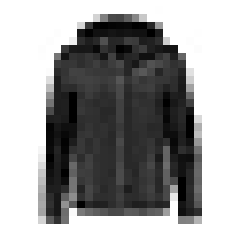

In [9]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [10]:
>>> class_names[y_train[0]]

'Coat'

#### Creating the model using the Sequential API

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

- The first line creates a `Sequential` model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.
- Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data `X`, it computes `X.reshape(-1, 28*28)`. This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape`, which doesn't include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, setting `input_shape=[28,28]`.
- Next we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each `Dense` layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes the output of a fully connected neuron. 
<br>
$h_{W, b}$(**X**) = $\phi$(**XW** + **b**)
- Then we add a second `Dense` hidden layer with 100 neurons, also using the ReLU activation function.
- Finally, we add a `Dense` output layer with 10 neurons (one per class), using the softmax activation function (because the classes are exclusive).

Instead of adding layers one by one, pass a list of layers when creating the `Sequential` model

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
>>> model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
>>> model.layers

In [15]:
>>> hidden1 = model.layers[1]

In [16]:
>>> hidden1.name

'dense_3'

In [17]:
>>> weights, biases = hidden1.get_weights()

In [18]:
>>> weights

array([[-0.00410078, -0.01791591,  0.03470009, ..., -0.0479835 ,
         0.00944619, -0.0581885 ],
       [ 0.00454222, -0.03459046, -0.05780675, ..., -0.03539259,
         0.05025648,  0.0318472 ],
       [ 0.07272382, -0.04564159, -0.06642101, ...,  0.07007335,
         0.00488419, -0.05605602],
       ...,
       [ 0.00890516,  0.01348815, -0.02411949, ..., -0.06758745,
        -0.01879891, -0.05852504],
       [ 0.01970009, -0.05046027,  0.05941723, ...,  0.03754229,
         0.04859976,  0.02850588],
       [ 0.01930685, -0.01134551,  0.04297371, ...,  0.01683535,
         0.01548282, -0.03000864]], dtype=float32)

In [19]:
>>> weights.shape

(784, 300)

In [20]:
>>> biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
>>> biases.shape

(300,)

To use a different initialization method for weights and biases, use `kernel_initializer` (*kernel* is another name for the matrix of connection weights) or `bias_initializer` when creating the layer

#### Compiling the model

After a model is created, you must call its `compile()` method to specify the loss function and the opimizer to use

In [22]:
model.compile(
    loss="sparse_categorical_crossentropy", 
    optimizer="sgd", 
    metrics=["accuracy"]
)

We use `"sparse_categorical_crossentropy"` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 1., 0., 0., 0., 0., 0. 0.]` to represent class 3), then we would need to use the `"categorical_crossentropy"` loss instead). If we are doing binary classification or multilabel binary classification, then we would use the `"sigmoid"` (i.e. logistic) activation function in the output layer instead of `"softmax"`, and we would use the `"binary_crossentropy"` loss

`"sgd"` (optimizer) means that we will train the model using simple Stochastic Gradient Descent. I.e., Keras will perform backpropagation

Since this is a classifier, it's useful to measure its `"accuracy"` (metrics) during training and evaluation

#### Training and evaluating the model

Model is ready to be trained. Call `fit()`

In [23]:
>>> history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7171 - accuracy: 0.7657 - val_loss: 0.5142 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4903 - accuracy: 0.8301 - val_loss: 0.4508 - val_accuracy: 0.8472
Epoch 3/30
1392/1719 [=======================>......] - ETA: 0s - loss: 0.4423 - accuracy: 0.8456

KeyboardInterrupt: 

Pass input features (`X_train`) and target classes (`y_train`), number of epochs, and validation set (optional). Keras measures the loss and the extra metrics on this set at the end of each epoch. If the performance on the training set is much better than the performance on the validation set, your model is overfitting the training set (or there is a bug, such as a data mismatch between the training set and validation set)

Accuracy between the training set and validation set seem consistent so there isn't much overfitting here. 

If training set was very skewed, with some classes being overrepresented and other underrepresented, set the `class_weight` argument when calling `fit()`, which would give a larger weight to underrepresented classes and lower weight to overrepresented classes. If you need per-instance weights, set the `sample_weight` argument (if both `class_weight` and `sample_weight` are provided, Keras multiplies them). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the `validation_data` tuple

`fit()` returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epochs`), and most importantly a dictionary (`history.history`) containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set. 

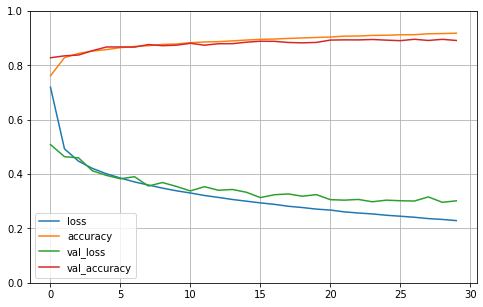

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0-1]
plt.show()

If not satisfied with the performance of the model, go back and tune the hyperparameters. First to check is learning rate. If that doesn't help, try another optimizer (and always retune learning rate after changing any hyperparameter). If performance is still not good, try tuning model hyperparameters such as the number of layers, number of neurons per layer, and the types of activation functions to use for each hidden layer. You can also try tuning other hyperparameters such as the batch size (set in the `fit()` method using `batch_size` argument, defaults to 32).

In [ ]:
>>> model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33087335378527644, 0.8834]

#### Using the model to make predictions

Use model's `predict()` method to make predicitons on new instances

In [ ]:
>>> X_new = X_test[:3]

In [ ]:
>>> y_proba = model.predict(X_new)

In [ ]:
>>> y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

model "believes" the first new instance is of class 9 (boot), etc

In [ ]:
>>> y_pred = model.predict_classes(X_new)

In [ ]:
>>> y_pred

array([9, 2, 1])

In [ ]:
>>> np.array(class_names)[y_pred]

NameError: name 'np' is not defined

In [ ]:
>>> y_new = y_test[:3]

In [ ]:
>>> y_new

array([9, 2, 1], dtype=uint8)

Predicted the classes correctly

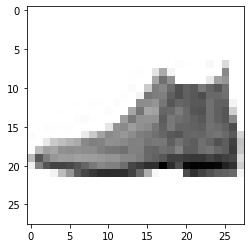

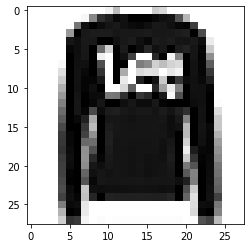

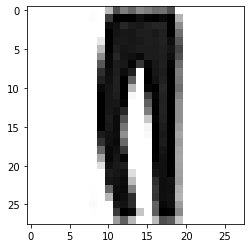

In [ ]:
for i in range(3):
    plt.imshow(X_test[i], cmap='binary')
    plt.show()

### Building a Regression MLP Using the Sequential API

California housing problem to tackle a regression neural network

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Main difference to creating a model for classification are that the output layer has a single neuron (we only want to predict a single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neurons than before, to avoid overfitting:

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.9183 - val_loss: 0.7770
Epoch 2/20
11610/11610 [==============================] - 0s 34us/sample - loss: 1.4207 - val_loss: 0.7208
Epoch 3/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.9889 - val_loss: 0.4404
Epoch 4/20
11610/11610 [==============================] - 0s 33us/sample - loss: 0.4015 - val_loss: 0.4816
Epoch 5/20
11610/11610 [==============================] - 0s 37us/sample - loss: 0.3867 - val_loss: 0.3926
Epoch 6/20
11610/11610 [==============================] - 0s 35us/sample - loss: 0.3694 - val_loss: 0.3933
Epoch 7/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3626 - val_loss: 0.3751
Epoch 8/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.4181 - val_loss: 0.3601
Epoch 9/20
11610/11610 [==============================] - 0s 32us/sample - loss: 0.3604 - val_l

In [ ]:
from sklearn.metrics import mean_squared_error

X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred - y_test[:3])

[[-0.01370635 -0.27470635 -2.62370635]
 [ 0.27275382  0.01175382 -2.33724618]
 [ 2.8733441   2.6123441   0.2633441 ]]


### Building Complex Models Using the Functional API

Example of a non-sequential neural network is the *Wide & Deep* neural network. It connects all our part of the inputs directly to the output layer. Makes it possible for network to learn both deep patters (using the deep path) and simple rules (using the short path). 

Build a Wide & Deep neural network to tackle the California housing problem:

In [ ]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

- First, create an `Input` object. This is a specification of the kind of input the model will get, including its `shape` and `dtype`. A model may have multiple inputs.
- Next, create a `Dense` layer with 30 neurons using the ReLU activation function. As soon as it's created, notice we call it like a function, passing it the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet. 
- Create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer. 
- Next create a `Concatenate` layer, and once again immediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the `keras.layers.concatenate()` function, which creates a `Concatenate` layer and immediately calls it with the given inputs. 
- Create the output layer, with a single neuron and no activation function, we call it like a function, passing it the result of the concatenation. 
- Lastly, create a Keras model, specifying which inputs and outputs to use.

What if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path? Suppose we want to send five features through the wide path (features 0 to 4) and six features through the deep path (features 2 to 7):

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

Compile the model as usual but pass a pair of matrices `(X_train_A, X_train_B)` when calling the `fit()` method. Same goes for `X_valid`, and for `X_test` and `X_new` when calling `evaluate()` or `predict()`

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 81us/sample - loss: 2.1867 - val_loss: 1.0233
Epoch 2/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.8513 - val_loss: 0.8124
Epoch 3/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.7395 - val_loss: 0.7402
Epoch 4/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6839 - val_loss: 0.6932
Epoch 5/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.6452 - val_loss: 0.6572
Epoch 6/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.6158 - val_loss: 0.6304
Epoch 7/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5926 - val_loss: 0.6073
Epoch 8/20
11610/11610 [==============================] - 0s 42us/sample - loss: 0.5740 - val_loss: 0.5891
Epoch 9/20
11610/11610 [==============================] - 0s 41us/sample - loss: 0.5586 - val_l

Many cases where you want to have multiple outputs:
- Task may demand it. E.g., locating and classifying the main object in a picture is both a regression and a classification task
- May have multiple independent tasks based on the same data. Neural networks can learn features in the data that are useful across tasks. E.g., you could perform *multitask classification* on pictures of faces, using one output to classify the person's facial expressions, and another output to identify whether they are wearing glasses or not.
- Regularization. E.g., you may want to add some auxilary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

In [ ]:
# [...] Same as above, up to the main output layer
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

Each output needs its own loss function, so when compiling the model, pass a list of losses (passing a single loss will make Keras assume the same loss must be used for all outputs). By default, Keras computes all these losses and simply adds them up to get the final loss used for training. We care more about the main output than the auxilary (used for regularization), so we want to give the main output's loss a much greater weight:

In [ ]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

When training the model, we need to provide labels for each output. Here, the main output and auxilary output try to predict the same thing so they should use the same labels:

In [ ]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid])
)

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test]
)

In [ ]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

### Using the Subclassing API to Build Dynamic Models

Sequential and Functional API models are declarative, static. For a more imperative programming style, use Subclassing API

For an instance of the Wide & Deep model equivalent to the one created above but using the Subclassing API

In [ ]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # handles the standard args (e.g, name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

### Saving and Restoring a Model

When using Sequential or Functional API

In [ ]:
model = keras.models.Sequential([...]) # or keras.Model([...])
model.compile([...])
model.fit([...])
model.save("my_keras_model.h5")

Keras uses HDF5 format to save both the model's architecture (including every layer's hyperparameters) and the values of all the model parameters for ever layer (e.g., connection weights and biases). Also saves optimizer (including its hyperparameters and any state it may have)

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. To load:

In [ ]:
model = keras.models.load_model('my_keras_model.h5')

### Using Callbacks

If training lasts several hours, save checkpoints at regular intervals during training, to avoid losing everything if your computer crashes

`fit()` method accepts a `callback` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch

In [ ]:
[...] # build and compile the model
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5')
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

`save_best_only=True` when creating `ModelCheckpoint`. This will only save your model when its performance on the validation set is the best so far.This way you don't have to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. Following implements early stopping:

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5') # roll back to best model

Implement early stopping using `EarlyStopping` callback. Interrupts training when it doesn't detect progress on the validation set for a number of epochs (defined by the `patience` argument) and it will optionally roll back to the best model. You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources).

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])

You can write your own custom callbacks. Example will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

- `on_train_begin()`
- `on_train_end()`
- `on_epoch_begin()`
- `on_epoch_end()`
- `on_batch_begin()`
- `on_batch_end()`

 Callbacks can also be used during evaluation and predictions (for debugging).


For evaluation (called by `evaluate()`):
- `on_test_begin()`
- `on_test_end()`
- `on_test_batch_begin()`
- `on_test_batch_end()`

For prediction (called by `predict()`):
- `on_predict_begin()`
- `on_predict_end()`
- `on_predict_batch_begin()`
- `on_predict_batch_end()` 

### Using Tensorflow for Visualization

TensorBoard is a great interactive visualization tool with many features. To use it, modify program so that it outputs the data you want to visualize to special binary log files called *event files*. Each binary data record is called a *summary*. TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows you to visualize live data (with a short delay). In general, you want to point the TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. 

Start by defining the root log directory to use for TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it's different at every run. 

In [ ]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

Keras provides a `TensorBoard()` callback

In [ ]:
[...] # Build an compile your model
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

## Fine-Tuning Neural Network Hyperparameters

One option is to try amny combinations of hyperparameters and see which works betst on the validation set (or use K-fold cross-validation). We can use `GridSearchCV` or `RandomizedSearchCV`

First step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

Creates a simple `Sequential` model for univariate regression (only one output neuron), with the given input shape and the given number of hidden layers and neurons, and it compiles it using an SGD optimizer configured with the specified learning rate

Next, create a `KerasRegressor` based on the `build_model()` function:

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Now we can use this object like a regular Scikit-Learn regressor: we can train it using `fit()`, then evaluate it using its `score()` method, and use it to make predictions using `predict()`:

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

ValueError: Error when checking input: expected input_2 to have 2 dimensions, but got array with shape (55000, 28, 28)

We want to train and evaluate hundreds of variants and see which one performs best on the validation set. Preferable to use Randomized Search because there are many hyperparameters:

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3], 
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

SyntaxError: invalid syntax (<ipython-input-16-43ff43ce1637>, line 7)

Note `RandomizedSearchCV` uses K-fold cross-validation, so it doesn't use X_valid and y_valid, which are only used for early stopping

Training and evalution may take several hours depending on different factors; we can access best parameters, best score, and trained Keras model after training like this:

In [ ]:
>>> rnd_search_cv.best_params_

In [ ]:
>>> rnd_search_cv.best_score_ 

In [ ]:
>>> model = rnd_search_cv.best_estimator_.model

# Exercises

1. N/A


2. Draw an ANN using the original artificial neurons (like the ones in Figure 10-3) that computes A xor B.

3. **Why is it generally preferable to use a Logistic Regression classifier than a classical Perceptron (i.e., a single layer of threshold logic units trained using the Perceptron training algorithm)? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?**
<br>
Unlike Logistic Regressions, Perceptrons do not output a class probability; rather, they make predictions based on a hard threshold. To make them equivalent, use Perceptron with a logistic sigmoid activation function.
<br>
*Perceptron will not converge if the data is not linearly separable, Logistic Regression with converge if the data is not linearly separable. Must also train it using an optimization function that minimizes the cost function like SGD or cross-entropy)*

4. **Why was the logistic activation function a key ingredient in training the first MLPs?**
<br>
The step function contains only flat segments, so there is no gradient to work with, while the logistic function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step.

5. **Name three popular activation functions. Can you draw them?**
<br>
Tanh, Sigmoid, ReLU
<br>
![tanh_v_sigmoid](tanh_v_sigmoid)
![relu](relu)

6. **Suppose you have an MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.**
- What is the shape of the input matrix **X**?
- What are the shapes of the hidden layer's weight vector **W**$_{h}$ and its bias vector **b**$_{h}$?
- What are the shapes of the output layer's weight vector **W**$_{o}$ and its bias vector **b**$_{o}$?
- What is the shape of the network's output matrix **Y**?
- Write the equation that computes the networks output matrix **Y** as a function of **X**, **W**$_{h}$, **b**$_{h}$, **W**$_{o}$, **b**$_{o}$.
<br><br>
(*m*,10) where *m* represents the training batch size
<br>
(1, 500), (1, 50)
<br>
(1, 150), (1, 3)
<br>
(*m*, 3)
<br>
**Y** = $\phi$(($\phi$(**XW**$_{h}$ + **b**$_{h}$))**W**$_{o}$ + **b**$_{o}$)

7. **How many neurons do you need in the output layer if you want to classify email into spam or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about getting your network to predict housing prices, as in Chapter 2?**
<br>
1; Logistic; 10; Softmax; 1; None

8. **What is backpropagation and how does it work? What is the difference between backpropagation and reverse-mode autodiff?**
<br>
It is an efficient technique for computing the gradients automatically: in just two passes through the network (one forward, one backward). It can find out how each connection weight and each bias term should be tweaked in order to reduce the error. For each training instance, first make a prediction (forward pass) and measure the error, then go through each layer in reverse to measure the error contribution from each connection (reverse pass) and finally tweak the connection weights to reduce the error (Gradient Descent). When moving backward, reverse-mode autodiff computes the partial derivatives all at once.

9. **Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP overfits the training data, how could you tweak these hyperparameters to try to solve the problem?**
<br>
number of hidden layers, number of neurons per hidden layer, activation function used in each layer, number of iterations; Try reducing the number of hidden layers/neurons per hidden layer

10. **Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`). See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles - save checkpoints, use early stopping, and plot learning curves using TensorBoard.**

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [26]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2022-11-25 00:52:14.195429: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-25 00:52:14.195474: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [

In [27]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('mnist_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [28]:
from sklearn.model_selection import train_test_split
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=5000, random_state=42)

11501568/11490434 [==============================] - 0s 0us/step


In [29]:
X_train.shape, X_valid.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

In [30]:
def build_mnist(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[28,28]):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [31]:
mnist_model = keras.wrappers.scikit_learn.KerasClassifier(build_mnist)

In [32]:
mnist_model.fit(
    X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

/home/arturo/miniconda3/envs/ml/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7774 - accuracy: 0.7960 - val_loss: 0.4139 - val_accuracy: 0.8844
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3648 - accuracy: 0.8992 - val_loss: 0.3322 - val_accuracy: 0.9064
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3123 - accuracy: 0.9120 - val_loss: 0.2967 - val_accuracy: 0.9156
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9200 - val_loss: 0.2725 - val_accuracy: 0.9252
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2637 - accuracy: 0.9258 - val_loss: 0.2558 - val_accuracy: 0.9286
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2484 - accuracy: 0.9298 - val_loss: 0.2435 - val_accuracy: 0.9326
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2359 - accuracy: 0.9336 - val_loss: 0.2311 - val_ac

In [33]:
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [1, 2],
    'n_neurons': np.arange(5, 100, 5),
    'learning_rate': reciprocal(3e-4, 3e-2)
}

mnist_search = RandomizedSearchCV(mnist_model, param_distribs, n_iter=10, cv=3)
mnist_search.fit(
    X_train, y_train, epochs=100, 
    validation_data=(X_valid, y_valid), 
    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb]
)

/home/arturo/miniconda3/envs/ml/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1146/1146 [==============================] - 3s 2ms/step - loss: 0.8455 - accuracy: 0.7903 - val_loss: 0.4589 - val_accuracy: 0.8800
Epoch 2/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.4008 - accuracy: 0.8909 - val_loss: 0.3593 - val_accuracy: 0.8964
Epoch 3/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.3396 - accuracy: 0.9053 - val_loss: 0.3204 - val_accuracy: 0.9098
Epoch 4/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.3071 - accuracy: 0.9128 - val_loss: 0.2896 - val_accuracy: 0.9200
Epoch 5/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.9193 - val_loss: 0.2689 - val_accuracy: 0.9274
Epoch 6/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.2643 - accuracy: 0.9251 - val_loss: 0.2548 - val_accuracy: 0.9288
Epoch 7/100
1146/1146 [==============================] - 2s 2ms/step - loss: 0.2485 - accuracy: 0.9300 - val_loss: 0.2412 - val_ac

KeyboardInterrupt: 